## Parallelisation

This code uses multiprocessing to speed up the computation time for game runs using multiple processors.

In [2]:
from MinorityGame2 import MinorityGame, Player
import numpy as np
import random
import matplotlib.pyplot as plt
import itertools

from multiprocessing import Pool, cpu_count
from simulation_mg import run_game

In [4]:
# Parallelized function
def simulate_and_plot(N, S, rounds, M):
    results = []
    z = np.exp((np.log(N)-np.log(9))/30)

    num_workers = cpu_count()  # Get number of CPU cores
    pool = Pool(processes=num_workers-2)  # Create a pool of workers

    for i in range(25):
        sigma = []
        n = int(N / (z**i))
        if n % 2 == 0:
            n += 1  # Ensure n is odd

        # Prepare arguments for parallel execution
        args_list = [(n, M, rounds, S) for _ in range(20)]

        # Run the simulations in parallel
        sigma = pool.map(run_game, args_list)

        s = np.average(sigma)
        print(2**M / n, s)
        results.append((2**M / n, s))

    pool.close()
    pool.join()  # Ensure all processes finish before moving forward

    # Convert results to plot
    x_values, y_values = zip(*results)
    plt.figure()
    plt.loglog(x_values, y_values, marker='o', linestyle='-', color='b')
    plt.xlabel(r"$2^M / N$")
    plt.ylabel(r"$\sigma^2 / N$")
    plt.title("Variance of Attendance Normalized by Number of Players")
    plt.grid(True)
    plt.savefig("Normalised variance vs z")
    plt.show()

2001 8 40000 2
0.127936031984008 0.6400946971557503
1671 8 40000 2
0.15320167564332735 0.44878491468680803
1395 8 40000 2
0.18351254480286738 0.3318956461084229
1165 8 40000 2
0.21974248927038625 0.2335074765877414
973 8 40000 2
0.263103802672148 0.15842871599694885
813 8 40000 2
0.3148831488314883 0.09693926652240928
679 8 40000 2
0.37702503681885124 0.06336117909402614
567 8 40000 2
0.4514991181657848 0.056114347651675486
473 8 40000 2
0.5412262156448203 0.060332366682346726
395 8 40000 2
0.6481012658227848 0.06854427368789556
331 8 40000 2
0.7734138972809668 0.07552822946799473
275 8 40000 2
0.9309090909090909 0.08832640663806818
231 8 40000 2
1.1082251082251082 0.09725470888839287
193 8 40000 2
1.3264248704663213 0.10883474783727332
161 8 40000 2
1.5900621118012421 0.11947887720438663
135 8 40000 2
1.8962962962962964 0.12633759060763888
113 8 40000 2
2.265486725663717 0.13903014472870573
93 8 40000 2
2.752688172043011 0.15568353503965054
79 8 40000 2
3.240506329113924 0.16673789370

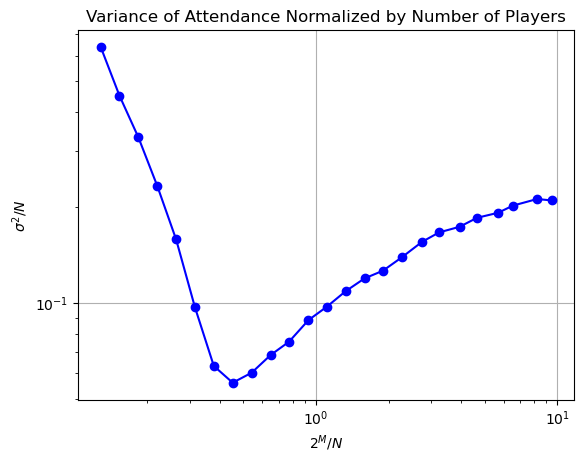

In [11]:
# Example simulation parameters
N = 2001      # Number of players
S = 2       # Number of strategies per player
rounds = 40000
M = 8  # memory

# Ensure multiprocessing runs correctly
if __name__ == "__main__":
    simulate_and_plot(N, S, rounds, M)


2001 8 20000 2
0.127936031984008 0.6273517128945526
1671 8 20000 2
0.15320167564332735 0.44825274413494914
1395 8 20000 2
0.18351254480286738 0.32183014196066306
1165 8 20000 2
0.21974248927038625 0.2329484147903434
973 8 20000 2
0.263103802672148 0.15850568069283147
813 8 20000 2
0.3148831488314883 0.10492318496971094
679 8 20000 2
0.37702503681885124 0.07380192554896907
567 8 20000 2
0.4514991181657848 0.06736461935119047
473 8 20000 2
0.5412262156448203 0.07108650721960888
395 8 20000 2
0.6481012658227848 0.07622814792056962
331 8 20000 2
0.7734138972809668 0.08455344211064955
275 8 20000 2
0.9309090909090909 0.09433663883772728
231 8 20000 2
1.1082251082251082 0.10475120426406925
193 8 20000 2
1.3264248704663213 0.11042117984132124
161 8 20000 2
1.5900621118012421 0.12201464271661491
135 8 20000 2
1.8962962962962964 0.13260825400370374
113 8 20000 2
2.265486725663717 0.14011564381526548
93 8 20000 2
2.752688172043011 0.15481924015994625
79 8 20000 2
3.240506329113924 0.163167770435

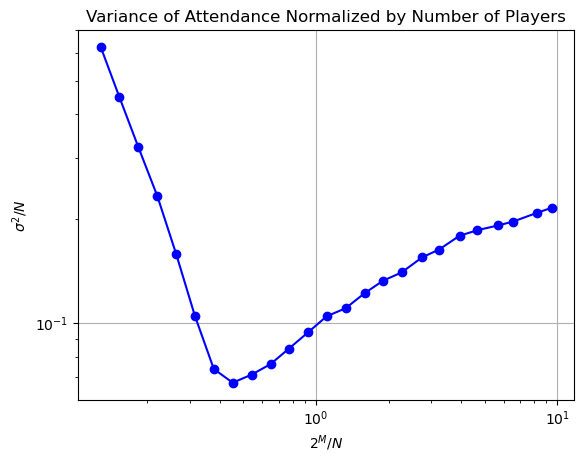

In [9]:
# Example simulation parameters
N = 2001      # Number of players
S = 2       # Number of strategies per player
rounds = 20000
M = 8  # memory

# Ensure multiprocessing runs correctly
if __name__ == "__main__":
    simulate_and_plot(N, S, rounds, M)

In [ ]:
N=101
S=2
M=5
